## Gradio Pets

In [25]:
%pip install  fastai
%pip install ipywidgets
%pip install gradio

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached gradio-5.46.1-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached audioop_lts-0.2.2-cp313-abi3-win_amd64.whl.metadata (2.0 kB)
  Using cached ffmpy-0.6.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-1.13.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-0.35.0-py3-none-any.whl.metadata (14 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.13.1-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached seman

In [3]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

C:\Users\marcinzi\.fastai\data\oxford-iiit-pet\images


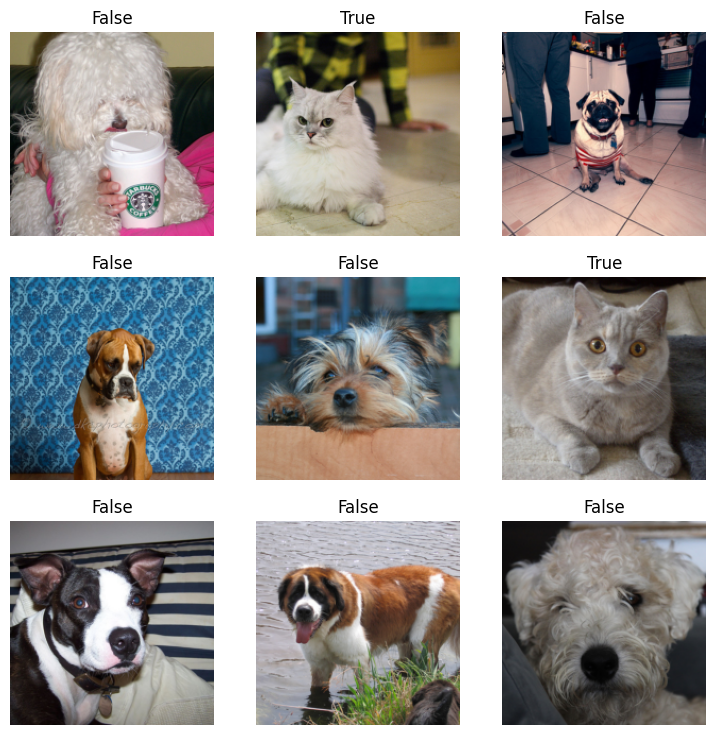

In [4]:
print(path)
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.192261,0.064159,0.021651,02:17


epoch,train_loss,valid_loss,error_rate,time
0,0.079816,0.030079,0.011502,02:14
1,0.040120,0.036210,0.012855,04:43
2,0.021390,0.017961,0.007442,02:19


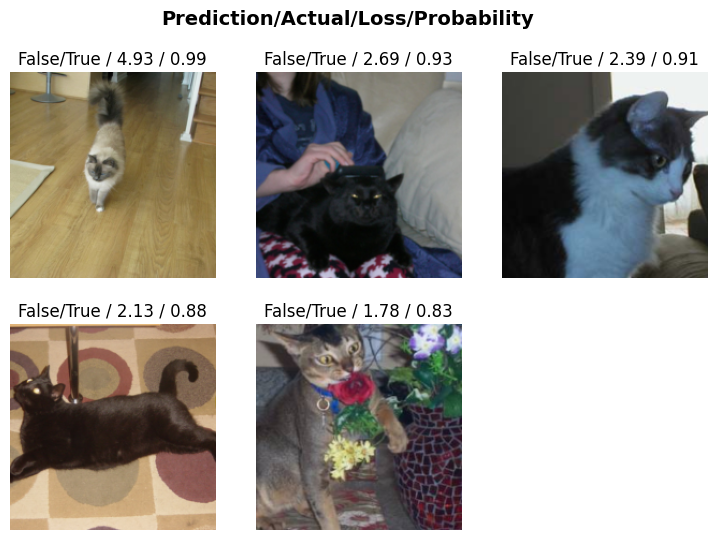

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_confusion_matrix()
interp.plot_top_losses(5)


In [ ]:
#|export
from fastai.learner import load_learner

learn = load_learner('model.pkl')

out = learn.get_preds(with_input=False, with_loss=True, with_decoded=True)
print(out)  # expect 4

(None, None, [])


In [ ]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)

cleaner

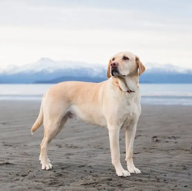

In [ ]:
im = PILImage.create('dog.png')
im.thumbnail((192,192))
im

In [21]:
category,_,probs = learn.predict(im)

print(f'Model answered: {category}')
print('=== probabilities ===')
for cat, p in zip( learn.dls.vocab, map(float,probs)):
    print(f"{cat}: {p:.4f}")

Model answered: False
=== probabilities ===
False: 1.0000
True: 0.0000


In [ ]:
from fastai.learner import load_learner
import gradio as gr

learn = load_learner('model.pkl')

def classify_img(img):
    p,i,prob = learn.predict(img)
    return dict(zip(learn.dls.vocab, map(float,prob)))

image = gr.Image()
label = gr.Label()
examples = ['dog.png', 'cat.png']
intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\marcinzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [ ]:
learn.export('model.pkl')
    


In [8]:
import torch
torch.cuda.is_available()
torch.cuda.get_device_name()

'Quadro RTX 3000 with Max-Q Design'